In [295]:
#importing libraries
# male = 1, female = 0
# Potential Biases: more males than females, right skewed

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#Setting random seed
np.random.seed(0)

In [297]:
data = pd.read_csv('https://raw.githubusercontent.com/plmkonist/AI4all/main/heart.csv')

In [298]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [299]:
clean_data = data.drop(columns =['restecg', 'slp', 'oldpeak'])

In [300]:
clean_data.head()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,150,0,0,1,1
1,37,1,2,130,250,0,187,0,0,2,1
2,41,0,1,130,204,0,172,0,0,2,1
3,56,1,1,120,236,0,178,0,0,2,1
4,57,0,0,120,354,0,163,1,0,2,1


In [301]:
clean_data.head()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,150,0,0,1,1
1,37,1,2,130,250,0,187,0,0,2,1
2,41,0,1,130,204,0,172,0,0,2,1
3,56,1,1,120,236,0,178,0,0,2,1
4,57,0,0,120,354,0,163,1,0,2,1


In [302]:
clean_data.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,4.000000,3.000000,1.000000


Potential Bias: Our data is skewed to the right

In [303]:
# data['output'] = data['output'].astype(str)

In [304]:
# Assigning training and testing data
#X_train, X_test, y_train, y_test = train_test_split(clean_data, Y, test_size=0.2)

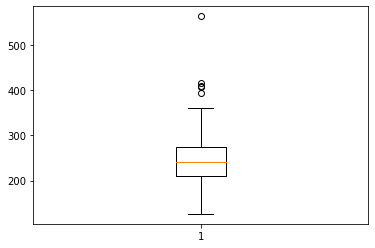

In [305]:
plt.boxplot(data.chol)
plt.show()

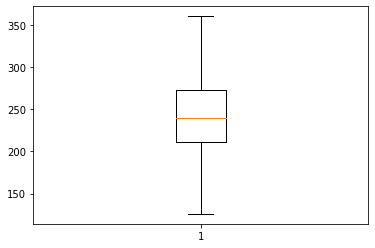

In [306]:
clean_data['chol'] = clean_data['chol'].astype(float)
clean_data = clean_data[clean_data.chol <= 380.0]
plt.boxplot(clean_data.chol)
plt.show()


In [307]:
# Creating a random forest classifier
#clf = RandomForestClassifier(n_jobs = 1, random_state = 0)
# Training Classifier
#clf.fit(X_train, y_train)

In [308]:
Y = clean_data.output
clean_data = clean_data.drop(columns = ['output'])

In [309]:
avg_score = 0.0
ntimes = 30
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(clean_data, Y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
avg_score


0.81